In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
parameters = get_config_file()['parameters']
visible_layer_size = parameters['visible_size']  # Number of qubits
hidden_layer_size = parameters['hidden_size']  # Number of hidden nodes

In [14]:
seed = 44  # Seed for random number generator
np.random.seed(seed)

b = utils.random_complex_array(visible_layer_size)  # Visible layer bias
c = utils.random_complex_array(hidden_layer_size)  # Hidden layer bias
W = utils.random_complex_matrix(visible_layer_size, hidden_layer_size)  # Visible - hidden weights
#H = random_hamiltonian(2**visible_layer_size)  # Hamiltonian

#H =np.array([[-2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 2]])
H = np.diag([-2, 0, 2, 4])  # Hamiltonian

In [15]:
walker = mcmc.Walker()
rbm = RBM(visible_bias=b, hidden_bias=c, weights=W)  # Initializing RBM currently with random configuration and parameters
model_1 = Model(rbm, walker, H)  # Initializing model with RBM and Hamiltonian
model_2 = copy.deepcopy(model_1)  # Cloning model to have two copies to train on

In [16]:
print(f"Estimated energy before training: {model_1.estimate_energy()}")
print(f"Exact energy (target): {min(np.linalg.eigvalsh(H))}")

Estimated energy before training: 2.88
Exact energy (target): -2.0


In [17]:
# Training models
fd_plot_list = model_1.gradient_descent('finite_difference')
analytic_plot_list = model_2.gradient_descent('analytical')


Gradient descent step 1, energy: (2.5227970591160203+1.8320229254166218e-18j)
Gradient descent step 2, energy: (2.255993620586174+0j)
Gradient descent step 3, energy: (1.972891960283777+0j)
Gradient descent step 4, energy: (1.6779776908838713+0j)
Gradient descent step 5, energy: (1.3750274963642646+0j)
Gradient descent step 6, energy: (1.066578956358665+0j)
Gradient descent step 7, energy: (0.7540714225990831+5.234147740949367e-18j)
Gradient descent step 8, energy: (0.4390583076079615+0j)
Gradient descent step 9, energy: (0.12533283998419048+0j)
Gradient descent step 10, energy: (-0.17935090683903288+0j)
Gradient descent step 11, energy: (-0.4639882354208522+0j)
Gradient descent step 12, energy: (-0.7179643476104296-8.610840735070139e-18j)
Gradient descent step 13, energy: (-0.9350385190233992+0j)
Gradient descent step 14, energy: (-1.11459932035088+0j)
Gradient descent step 15, energy: (-1.2601691883159318+3.0126643494869364e-18j)
Gradient descent step 16, energy: (-1.3771382694835395

Gradient descent step 30, energy: (3.8318771192340955-1.334459931187234e-19j)
Gradient descent step 31, energy: (3.838925296506934-8.0179327386852e-22j)
Gradient descent step 32, energy: (3.8452848213162714+0j)
Gradient descent step 33, energy: (3.851032349892322+2.2596605904682067e-16j)
Gradient descent step 34, energy: (3.8562352842322576+0j)
Gradient descent step 35, energy: (3.8609529179136763-1.273161146190261e-19j)
Gradient descent step 36, energy: (3.8652374515589414-7.128453827592663e-22j)
Gradient descent step 37, energy: (3.8691348871659224+0j)
Gradient descent step 38, energy: (3.872685812035711+8.752486800186303e-20j)
Gradient descent step 39, energy: (3.875926083511676+2.4644499064474776e-16j)
Gradient descent step 40, energy: (3.8788874255613046+0j)
Gradient descent step 41, energy: (3.881597947643659-2.0774249615901004e-16j)
Gradient descent step 42, energy: (3.8840825954926403-1.9177507194208977e-16j)
Gradient descent step 43, energy: (3.8863635425325302+0j)
Gradient de

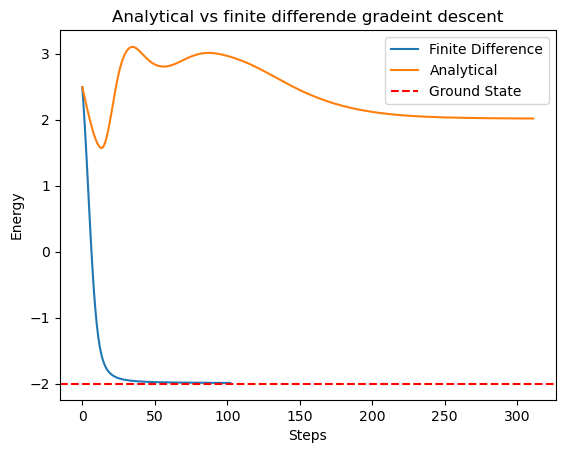

In [14]:
plt.plot(np.real(fd_plot_list), label='Finite Difference')
plt.plot(np.real(analytic_plot_list), label='Analytical')
plt.axhline(y=min(np.linalg.eigvalsh(H)), color='red', linestyle='--', label='Ground State')
plt.title('Analytical vs finite differende gradeint descent')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.legend()


In [11]:
print(f"Estimated energy FD: {model_1.estimate_energy()}")
print(f"Estimated energy Analytic: {model_2.estimate_energy()}")

Estimated energy FD: -2.0
Estimated energy Analytic: 2.06
